In [11]:
import sys
import os
import pandas as pd
import nltk

#visuals
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [12]:
sys.path.append(os.path.abspath("../src"))

In [13]:
from sentiment import VADERSentimentAnalyzer

In [14]:

df = pd.read_csv("../data/clean_reviews.csv")  # Replace with your file path
analyzer = VADERSentimentAnalyzer()
result_df = analyzer.analyze_dataframe(df)

result_df.to_csv("../data/vader_sentiment_reviews.csv", index=False)
print("Sentiment analysis complete.")
print(result_df['sentiment_label'].value_counts())

Sentiment analysis complete.
sentiment_label
positive    772
neutral     308
negative    120
Name: count, dtype: int64


####  Thematic Analysis:

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1, 2), max_features=50)
X = vectorizer.fit_transform(result_df["processed_review"])
keywords = vectorizer.get_feature_names_out()
print("Top keywords:", keywords[:20])


Top keywords: ['account' 'amazing' 'app' 'application' 'bank' 'banking' 'banking app'
 'best' 'best app' 'boa' 'ca' 'cbe' 'dashen' 'dashen bank' 'developer'
 'digital' 'easy' 'easy use' 'excellent' 'experience']


In [16]:
# Vectorize the dataset
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(result_df['processed_review'])

# Get top keywords
keywords = vectorizer.get_feature_names_out()
print("Top Keywords:", keywords)

Top Keywords: ['able' 'access' 'account' 'ahead' 'also' 'always' 'amazing' 'app'
 'application' 'apps' 'bad' 'bank' 'banking' 'best' 'better' 'bill' 'boa'
 'ca' 'cbe' 'convenient' 'crash' 'customer' 'dashen' 'developer' 'digital'
 'easy' 'ethiopia' 'even' 'ever' 'every' 'everything' 'excellent'
 'experience' 'fast' 'feature' 'financial' 'fix' 'friendly' 'get' 'give'
 'good' 'great' 'highly' 'issue' 'keep' 'know' 'life' 'like' 'love' 'make'
 'many' 'mobile' 'money' 'much' 'need' 'never' 'new' 'nice' 'ok' 'one'
 'option' 'payment' 'phone' 'platform' 'please' 'problem' 'really'
 'reliable' 'say' 'screenshot' 'seamless' 'secure' 'security' 'service'
 'simple' 'slow' 'smooth' 'sometimes' 'step' 'super' 'system' 'take'
 'thank' 'time' 'transaction' 'transfer' 'try' 'turn' 'update' 'use'
 'used' 'user' 'using' 'version' 'well' 'work' 'working' 'worst' 'wow'
 'ነው']


In [17]:
# Filter positive and negative reviews
positive_reviews = df[df['sentiment_label'] == 'positive']['processed_review']
negative_reviews = df[df['sentiment_label'] == 'negative']['processed_review']

# Extract keywords from positive reviews
vectorizer_pos = TfidfVectorizer(max_features=50)
X_pos = vectorizer_pos.fit_transform(positive_reviews)
print("Top Keywords in Positive Reviews:", vectorizer_pos.get_feature_names_out())

# Extract keywords from negative reviews
vectorizer_neg = TfidfVectorizer(max_features=50)
X_neg = vectorizer_neg.fit_transform(negative_reviews)
print("Top Keywords in Negative Reviews:", vectorizer_neg.get_feature_names_out())

Top Keywords in Positive Reviews: ['amazing' 'app' 'application' 'apps' 'bank' 'banking' 'best' 'better'
 'cbe' 'convenient' 'customer' 'dashen' 'developer' 'digital' 'easy'
 'ever' 'excellent' 'experience' 'fast' 'feature' 'good' 'great' 'issue'
 'keep' 'like' 'love' 'make' 'mobile' 'need' 'nice' 'ok' 'one' 'option'
 'payment' 'please' 'really' 'reliable' 'secure' 'service' 'smooth'
 'super' 'thank' 'time' 'transaction' 'transfer' 'use' 'user' 'using'
 'work' 'wow']
Top Keywords in Negative Reviews: ['account' 'always' 'app' 'application' 'bad' 'bank' 'banking' 'big' 'boa'
 'ca' 'crash' 'customer' 'developer' 'disappointing' 'error' 'even' 'ever'
 'experience' 'fails' 'fix' 'frequently' 'frustrating' 'know' 'make'
 'mobile' 'money' 'much' 'need' 'never' 'one' 'option' 'phone' 'please'
 'poor' 'problem' 'seen' 'service' 'slow' 'system' 'take' 'time'
 'transaction' 'transfer' 'update' 'use' 'useless' 'using' 'work'
 'working' 'worst']


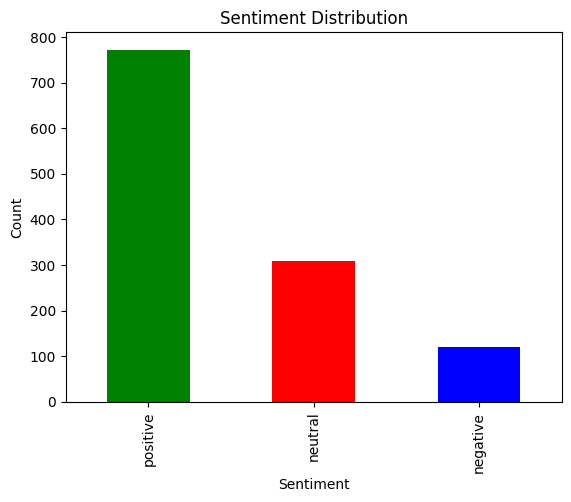

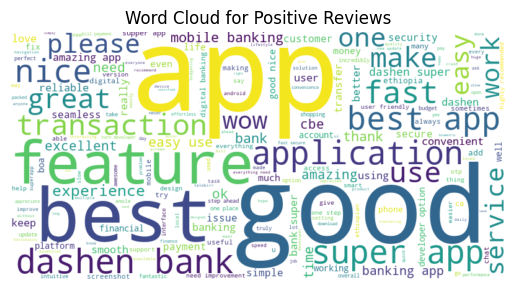

In [19]:
# Sentiment distribution
df['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Word cloud for positive reviews
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

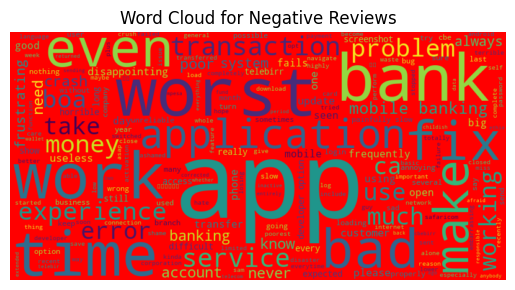

In [20]:
negative_text = ' '.join(negative_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()